# Feature Engineering 

Feature Engineering is the process of transforming raw data into meaningful features that can be used as input for advanceced visualisations or machine learning algorithms.

It involves selecting, creating, and transforming features to hopefully enhance the dataset.

Poorly designed features can lead to a disruptive dataset. 


## Types of Feature Engineering

* **Handling Missing Values**

    Filling missing values with appropriate strategies, e.g., mean, median, or constant values.

* **Encoding Categorical Variables**

    Converting categorical data into numeric form, such as one-hot encoding or label encoding. Only needed if you are building a model

* **Binning Numeric Variables**

    Grouping continuous data into bins or categories to simplify the representation.

* **Feature Scaling**

    Scaling features to bring them to a similar range, e.g., Min-Max scaling or Standard scaling.

* **Creating New Features**

    Generating new features by combining or transforming existing ones.

* **Handling Outliers**

    Managing extreme values that can affect model performance.

* **Feature Joining**

    Creating new features by combining multiple existing features.

## Imports and Dataset

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("Cleaned_insurance_claimsV2.csv")

In [19]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Count Blank
0,328,48,521585,17/10/2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,0
1,228,42,342868,27/06/2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,0
2,134,29,687698,06/09/2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,0
3,256,41,227811,25/05/1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,0
4,228,44,367455,06/06/2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,0


### Missing Values

In [20]:
null_counts = df.isnull().sum()
null_counts

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [22]:
df_new = df.drop("Count Blank", axis = 1)

In [23]:
df_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17/10/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27/06/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06/09/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25/05/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06/06/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


### Binding Numeric Data

In [24]:
df_new.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.961000,546238.648000,1134.000000,1256.996110,1.101000e+06,501214.488000,25170.282000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52776.784000,7436.461000,7397.946000,37928.950000,2005.103000
std,115.113174,9.126378,257063.005276,610.669237,243.903669,2.297407e+06,71701.610941,27850.117663,28104.096686,6.951373,1.01888,0.820127,1.111335,26352.856884,4880.949084,4824.682632,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1090.567500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41962.500000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1258.425000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,57880.000000,6780.000000,6745.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70532.500000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000


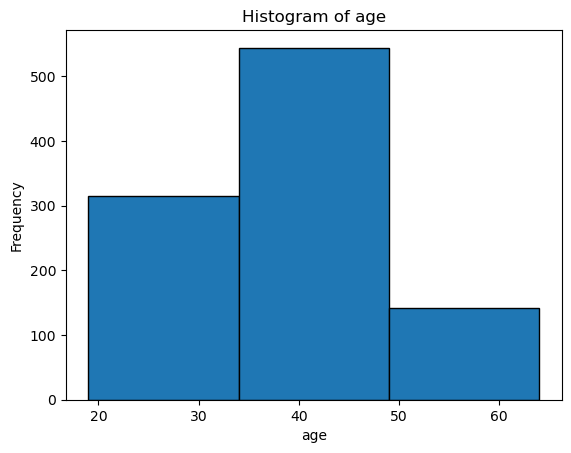

In [36]:
# Choose the column for the histogram
column_name = 'age'

# Plot the histogram
plt.hist(df[column_name], bins=3, edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name}')

# Display the histogram
plt.show()

In [26]:
bin_edges = [0, 30, 55, 100]  # Define the bin edges
bin_labels = ['Young Adult', 'Middle Aged', 'Elderly']  # Corresponding labels for each bin

# Create a new column based on the bin labels
df_new['ages_category'] = pd.cut(df_new['age'], bins=bin_edges, labels=bin_labels)

In [27]:
df_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category
0,328,48,521585,17/10/2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,Middle Aged
1,228,42,342868,27/06/2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,Middle Aged
2,134,29,687698,06/09/2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,Young Adult
3,256,41,227811,25/05/1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,Middle Aged
4,228,44,367455,06/06/2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,Middle Aged


In [28]:
bin_edges_customer = [0, 25, 150, 500]  # Define the bin edges
bin_labels_customer = ['New Client', 'Established Client', 'Long-Term Client']  # Corresponding labels for each bin

# Create a new column based on the bin labels
df_new['customer_category'] = pd.cut(df_new['months_as_customer'], bins=bin_edges_customer, labels=bin_labels_customer)

In [29]:
df_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category
0,328,48,521585,17/10/2014,OH,250/500,1000,1406.91,0,466132,...,71610,6510,13020,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client
1,228,42,342868,27/06/2006,IN,250/500,2000,1197.22,5000000,468176,...,5070,780,780,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client
2,134,29,687698,06/09/2000,OH,100/300,2000,1413.14,5000000,430632,...,34650,7700,3850,23100,Dodge,RAM,2007,N,Young Adult,Established Client
3,256,41,227811,25/05/1990,IL,250/500,2000,1415.74,6000000,608117,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client
4,228,44,367455,06/06/2014,IL,500/1000,1000,1583.91,6000000,610706,...,6500,1300,650,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client


## Creating New Features

In [30]:
df_new["Contract Years"] = df_new["months_as_customer"]/12

In [31]:
df_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years
0,328,48,521585,17/10/2014,OH,250/500,1000,1406.91,0,466132,...,6510,13020,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client,27.333333
1,228,42,342868,27/06/2006,IN,250/500,2000,1197.22,5000000,468176,...,780,780,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,19.000000
2,134,29,687698,06/09/2000,OH,100/300,2000,1413.14,5000000,430632,...,7700,3850,23100,Dodge,RAM,2007,N,Young Adult,Established Client,11.166667
3,256,41,227811,25/05/1990,IL,250/500,2000,1415.74,6000000,608117,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,21.333333
4,228,44,367455,06/06/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1300,650,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client,19.000000


## Feature Joining

In [32]:
df_new['total_premiums_paid'] = (df_new['policy_annual_premium']/12) * df_new['months_as_customer']

In [33]:
df_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years,total_premiums_paid
0,328,48,521585,17/10/2014,OH,250/500,1000,1406.91,0,466132,...,13020,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client,27.333333,38455.540000
1,228,42,342868,27/06/2006,IN,250/500,2000,1197.22,5000000,468176,...,780,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,19.000000,22747.180000
2,134,29,687698,06/09/2000,OH,100/300,2000,1413.14,5000000,430632,...,3850,23100,Dodge,RAM,2007,N,Young Adult,Established Client,11.166667,15780.063333
3,256,41,227811,25/05/1990,IL,250/500,2000,1415.74,6000000,608117,...,6340,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,21.333333,30202.453333
4,228,44,367455,06/06/2014,IL,500/1000,1000,1583.91,6000000,610706,...,650,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client,19.000000,30094.290000


In [34]:
df_new['net_value_of_customer'] = df_new['total_premiums_paid'] - df_new['total_claim_amount']

In [35]:
df_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years,total_premiums_paid,net_value_of_customer
0,328,48,521585,17/10/2014,OH,250/500,1000,1406.91,0,466132,...,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client,27.333333,38455.540000,-33154.460000
1,228,42,342868,27/06/2006,IN,250/500,2000,1197.22,5000000,468176,...,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,19.000000,22747.180000,17677.180000
2,134,29,687698,06/09/2000,OH,100/300,2000,1413.14,5000000,430632,...,23100,Dodge,RAM,2007,N,Young Adult,Established Client,11.166667,15780.063333,-18869.936667
3,256,41,227811,25/05/1990,IL,250/500,2000,1415.74,6000000,608117,...,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,21.333333,30202.453333,-33197.546667
4,228,44,367455,06/06/2014,IL,500/1000,1000,1583.91,6000000,610706,...,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client,19.000000,30094.290000,23594.290000


## Saving the csv for late

In [51]:
df_new.to_csv('Advanced Features Claims Data.csv')

## Go wild

Go out a see what other features you can create that will be useful for our visualisations

## Feature Engineering

Grouping the total Claim amounts by age

In [38]:
import pandas as pd

# Assuming df is your DataFrame and 'group_column' is the column you want to group by
grouped = df.groupby('age')

# Create aggregated features
aggregated_features = grouped['total_claim_amount'].agg(['sum', 'mean', 'count', 'min', 'max'])

print(aggregated_features)

         sum          mean  count    min     max
age                                             
19     48950  48950.000000      1  48950   48950
20     48360  48360.000000      1  48360   48360
21    405330  67555.000000      6  40500   94930
22     86130  86130.000000      1  86130   86130
23    362740  60456.666667      6  41850   98340
24    398590  39859.000000     10   3960   74700
25    753160  53797.142857     14   5640   77130
26   1428610  54946.538462     26   3190   90400
27   1117240  46551.666667     24   3190   90970
28   1608460  53615.333333     30   3200  101860
29   1745900  49882.857143     35   3850   94560
30   2243400  53414.285714     42   4500  107900
31   2032150  48384.523810     42   3600   93730
32   1942930  51129.736842     38    100   84590
33   1917390  49163.846154     39   2250   95810
34   2347384  53349.636364     44   3770  105040
35   1335420  41731.875000     32   2640   88660
36   1676510  52390.937500     32   2800   79560
37   2262880  55192.

## Checking the total claim distrabution by state


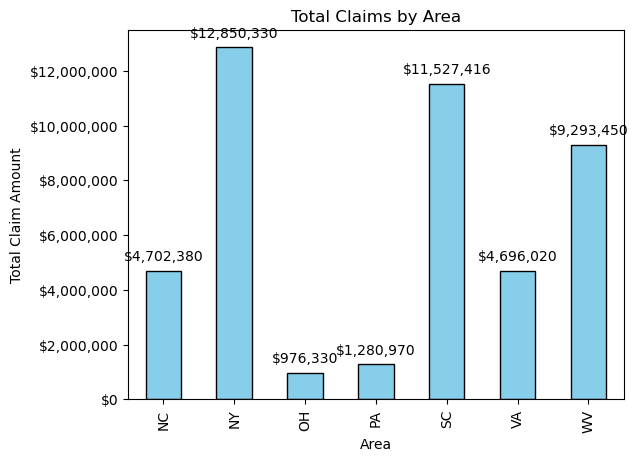

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Calculate the total claims by area
df['Total_Claim'] = df['property_claim'] + df['vehicle_claim']
total_claims_by_area = df.groupby('incident_state')['Total_Claim'].sum()

# Create a bar plot
ax = total_claims_by_area.plot(kind='bar', color='skyblue', edgecolor='black')

# Format y-axis as currency
formatter = ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x))
ax.yaxis.set_major_formatter(formatter)

# Add data labels
for p in ax.patches:
    ax.annotate('${:,.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Total Claims by Area')
plt.xlabel('Area')
plt.ylabel('Total Claim Amount')

plt.show()

## Checking the total claim distrabution by age category


C:\Users\F5249694\AppData\Local\Temp\ipykernel_4032\2738921357.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_claims_by_age = df_new.groupby('ages_category')['Total_Claim'].sum()


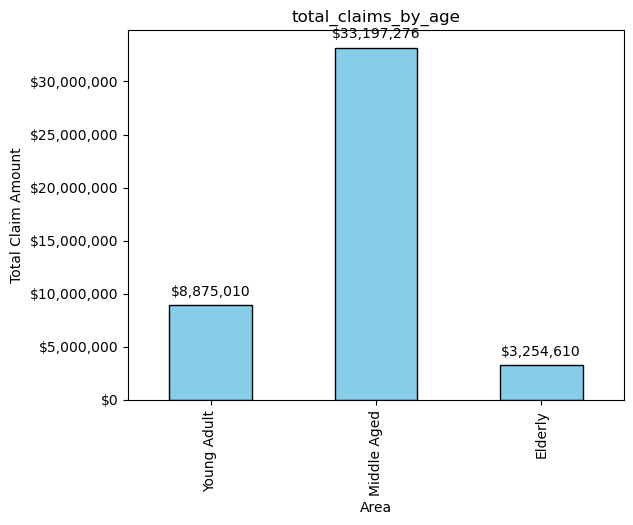

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Calculate the total claims by area
df_new['Total_Claim'] = df_new['property_claim'] + df_new['vehicle_claim']
total_claims_by_age = df_new.groupby('ages_category')['Total_Claim'].sum()

# Create a bar plot
ax = total_claims_by_age.plot(kind='bar', color='skyblue', edgecolor='black')

# Format y-axis as currency
formatter = ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x))
ax.yaxis.set_major_formatter(formatter)

# Add data labels
for p in ax.patches:
    ax.annotate('${:,.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('total_claims_by_age')
plt.xlabel('Area')
plt.ylabel('Total Claim Amount')

plt.show()

## Checking the claim frequency by age


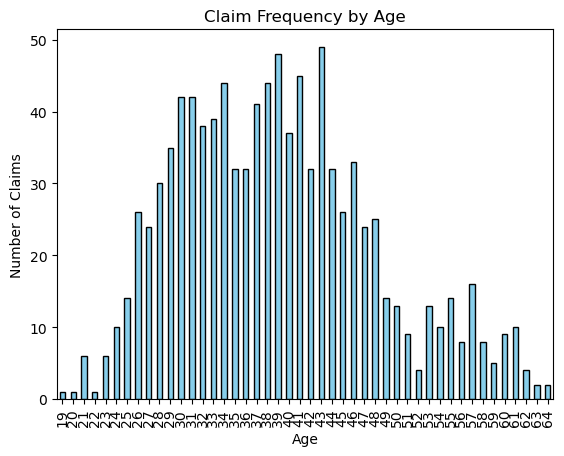

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

claims_by_age = df['age'].value_counts().sort_index()

claims_by_age.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Claim Frequency by Age')
plt.xlabel('Age')
plt.ylabel('Number of Claims')

plt.show()


## Including a trend line to a scatter plot


Based on the view below we note that most claims takes place between the ages or 30 - 50


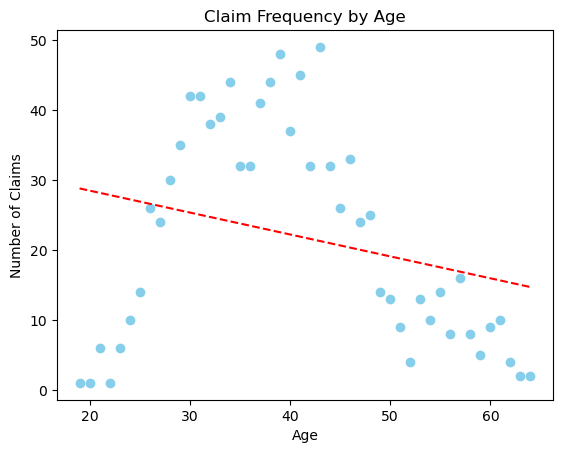

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

claims_by_age = df['age'].value_counts().sort_index()

plt.scatter(claims_by_age.index, claims_by_age.values, color='skyblue')

z = np.polyfit(claims_by_age.index, claims_by_age.values, 1)
p = np.poly1d(z)

plt.plot(claims_by_age.index,p(claims_by_age.index),"r--")

plt.title('Claim Frequency by Age')
plt.xlabel('Age')
plt.ylabel('Number of Claims')

plt.show()

## Checking claims by occupation


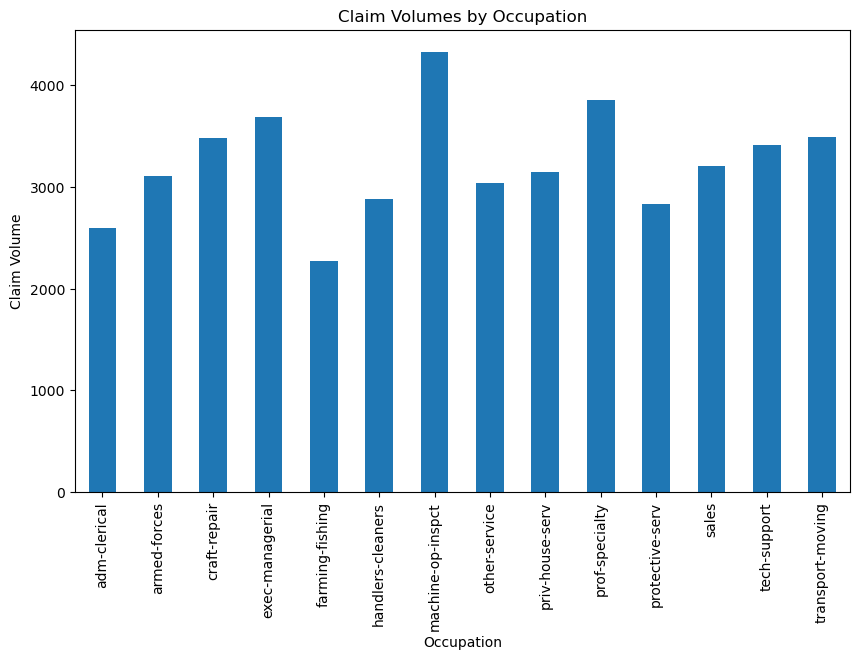

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

df_new['Total_Claim'] = df_new['property_claim'] + df_new['vehicle_claim']

df['ClaimVolume'] = df['Total_Claim'] / 1000

occupation_claims = df.groupby('insured_occupation')['ClaimVolume'].sum()

# Create bar plot
plt.figure(figsize=(10,6))
occupation_claims.plot(kind='bar')
plt.title('Claim Volumes by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Claim Volume')
plt.show()

In [68]:
df_new.to_csv('Advanced Features Claims Data.csv')